# 图像特效-波浪效果

In [1]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.lib.function_base import histogram

In [5]:
src = cv2.imread('../datas/sunset2.jpg')
gray = cv2.imread('../datas/sunset2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [10]:
def wave(src,degree=60):
    srcf = src.astype(np.float32)
    if len(src.shape) < 3:
        srcf = cv2.cvtColor(src,cv2.COLOR_GRAY2RGB).astype(np.float32)
    dst = np.zeros_like(srcf)
    rows,cols,ch = srcf.shape
    for i in range(rows):
        for j in range(cols):
            ni = int(degree * np.sin(j * np.pi * 2 / 128) + i)
            nj = int(degree * np.cos(i * np.pi * 2 / 128) + j)
            if ni < 0:
                ni = 0
            if ni >= rows:
                ni = rows - 1
            if nj < 0:
                nj = 0
            if nj >= cols:
                nj = cols - 1
            dst[i,j] = srcf[ni,nj]
    return np.uint8(dst)

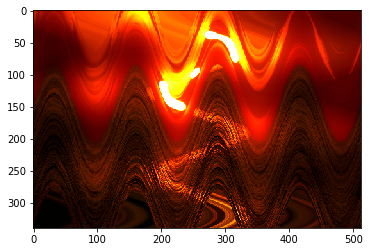

In [11]:
dst = wave(rgb,60)
plt.imshow(dst)